# DSCI 100 Group 10: Project Proposal

## Group Members:
- Mohammed Samiul ISLAM SAMI, 58031451
- Narjis Alhusseini, 66272287
- Yangyi Zhu, 67642025
- Norman Wu, 24434375


# Predicting diabetic patients using the concentration of Glucose, Insulin, and BMI as predictors. 

## Introduction
Diabetes Mellitus is a health condition which affects how an individual’s body processes the sugar, glucose. Both type 1 and type 2 diabetes patients have a low concentration of the hormone, insulin, which typically promotes the uptake of glucose into cells as a source of stored energy. Therefore, lower levels of insulin will lead to increased levels of blood glucose ultimately resulting in the chronic illness of diabetes. 

Using our Kaggle derived dataset originally sourced from the National Institute of Diabetes and Digestive and Kidney Diseases, we will work to answer the question: can glucose concentration, insulin levels, and Body Mass Index (BMI) data determine whether an individual has diabetes?

The presented dataset is about female diabetic patients of ages 21 or older from the Pima Indian heritage. The following columns are included: 

- Pregnancies (the number of pregnancies the patient had)
    - **pregnancies**
- Glucose (Plasma glucose concentration, a 2 hour oral glucose tolerance test. $mg/dL$)
    - **glucose**
- Blood Pressure (Diastolic blood pressure in $mm\,Hg$)
    - **blood_pressure**
- Skin Thickness (Triceps skin fold thickness in $mm$)
    - **skin_thickness**
- Insulin (2 Hour serum insulin in $\mu U/mL$)
    - **insulin**
- BMI (Body Mass Index in $kg/m^2$)
    - **bmi**
- Diabetes pedigree function (uncommon genetic measure of the likelihood that a patient will have diabetes based on family history)
    - **dpf**
- Age (years)
    - **age**
- Outcome (a value indicating whether or not the patient is diabetic)
    - **outcome**

## Preliminary Exploratory Data Analysis 
The data does have some missing values where they opted to use 0 instead, I fixed this by replacing the values with NA. Additionally, there are some inconsistencies in the dataframe which need to be corrected to better fit the conventions of DSCI 100.

In [1]:
library(tidyverse)
library(ggplot2)
library(repr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
# This data downloaded from kaggle, https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database?select=diabetes.csv.
# The csv file was downloaded and loaded onto github and the jupyter.
download.file("https://raw.githubusercontent.com/narjisaa/dsci-100-2023w1-group-10/main/data/diabetes.csv", "data/diabetes.csv")
diabetes_data <- read_csv("data/diabetes.csv")
head(diabetes_data)

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0


In [3]:
# Cleaned column names
colnames(diabetes_data) <- c("pregnancies", "glucose", "blood_pressure", "skin_thickness", "insulin", "bmi", "dpf", "age", "outcome")
head(diabetes_data)

# Casted outcame into chr to change names
class(diabetes_data$outcome) = "chr"
head(diabetes_data)

pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,dpf,age,outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0


pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,dpf,age,outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0


In [4]:
# Replace all 0 with NA
diabetes_data$glucose[diabetes_data$glucose == 0] <- NA
diabetes_data$skin_thickness[diabetes_data$skin_thickness == 0] <- NA
diabetes_data$insulin[diabetes_data$insulin == 0] <- NA
diabetes_data$bmi[diabetes_data$bmi == 0] <- NA
diabetes_data$dpf[diabetes_data$dpf == 0] <- NA
diabetes_data$age[diabetes_data$age == 0] <- NA

# Change all 0 to non-diabetic and all 1 to diabetic
diabetes_data$outcome[diabetes_data$outcome == 0] <- "non-diabetic"
diabetes_data$outcome[diabetes_data$outcome == 1] <- "diabetic"

# Casting outcome into factor
diabetes_data <- diabetes_data |>
                 mutate(outcome = as.factor(outcome))

head(diabetes_data)

pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,dpf,age,outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
6,148,72,35,NA,33.6,0.627,50,diabetic
1,85,66,29,NA,26.6,0.351,31,non-diabetic
8,183,64,NA,NA,23.3,0.672,32,diabetic
1,89,66,23,94,28.1,0.167,21,non-diabetic
0,137,40,35,168,43.1,2.288,33,diabetic
5,116,74,NA,NA,25.6,0.201,30,non-diabetic


In [5]:
diabetes_mean0 <- diabetes_data |>
                 filter(outcome == "non-diabetic") |>
                 map_df(mean, na.rm = TRUE) |>
                 mutate(outcome = "non-diabetic")
diabetes_mean1 <- diabetes_data |>
                 filter(outcome == "diabetic") |>
                 map_df(mean, na.rm = TRUE) |>
                 mutate(outcome = "diabetic")
diabetes_means <- diabetes_mean0 |>
                  add_row(diabetes_mean1)
diabetes_means

Warning message in mean.default(.x[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(.x[[i]], ...):
“argument is not numeric or logical: returning NA”


pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,dpf,age,outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
3.298000,110.6439,68.18400,27.23546,130.2879,30.85967,0.429734,31.19000,non-diabetic
4.865672,142.3195,70.82463,33.00000,206.8462,35.40677,0.550500,37.06716,diabetic


Here we can see some idea of how can a person with diabetes differ from a person without. The pregnancies, blood glucose level and insulin levels of the non-diabetic is generally lower. The average glucose level according to Kudva (2023) for a fasting person (glucose tests were taken when they were fasting) is less than 100 $mg/dL$ and under 125 $mg/dL$ is prediabetes, anything over could be diabetes. 

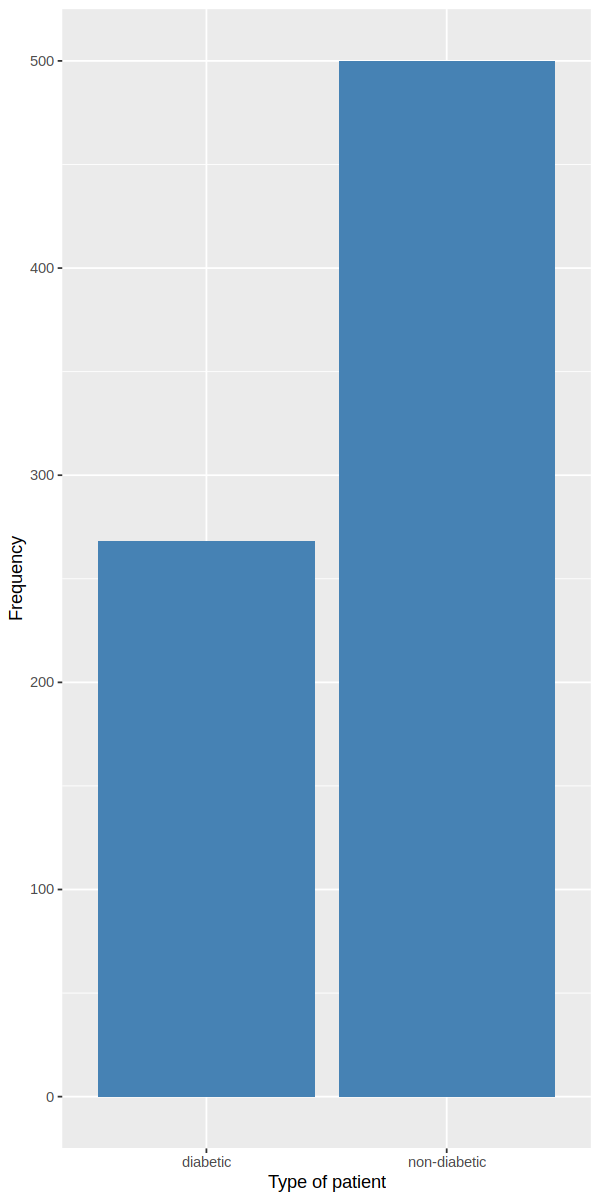

In [6]:
# Since we will be using K-nearest algorithm to classify whether a observation is diabetic or not, 
# we should see whether there is vast difference in amount of the data for both sides.
diabetes_count <- diabetes_data |>
                  group_by(outcome) |>
                  summarize(count = n())

options(repr.plot.height = 10, repr.plot.width = 5)
count_plot <- ggplot(diabetes_count,aes(x=outcome,y=count)) +
              geom_bar(stat = "identity", fill="steelblue") +
              labs(x = "Type of patient", y = "Frequency")
count_plot

As shown here, there is a bias in the data, therefore when using the K-nearest algorithm we should adjust the data such that equal parts are being used. Additionally, normalizing the data is important.

Warning message:
“Removed 375 rows containing missing values (`geom_point()`).”


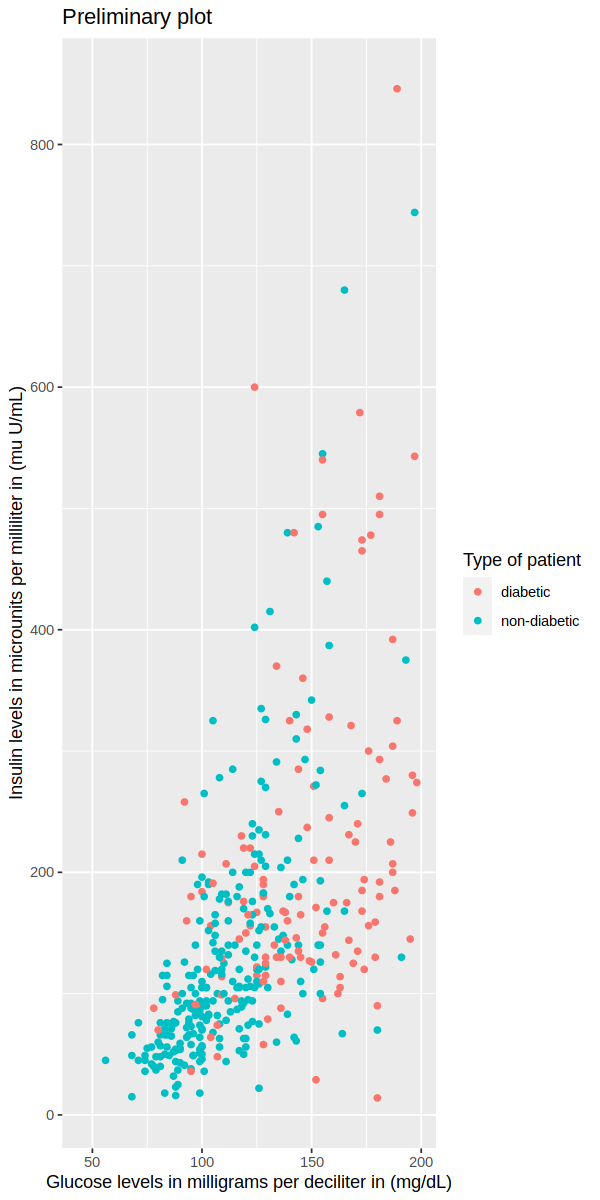

In [7]:
options(repr.plot.height = 10, repr.plot.width = 5)
diabetic_explore <- ggplot(diabetes_data, aes(x = glucose, y = insulin)) +
                    geom_point(aes(color = outcome)) +
                    labs(x = "Glucose levels in milligrams per deciliter in (mg/dL)",
                         y = "Insulin levels in microunits per milliliter in (mu U/mL)",
                         color = "Type of patient",
                        title = "Preliminary plot")
diabetic_explore

## Methods

Our data analysis will be conducted using the “k-nearest neighbors” algorithm, a machine learning technique often used for classification tasks. For our specific data set, three predictors will be used; glucose levels, insulin levels, and BMI (Body Mass Index). The results of the “k-nearest neighbors” algorithm will be visualized via a scatter plot containing glucose levels on the x-axis, insulin on the y-axis, and color coded with two colors meaning either diabetes or no diabetes. 

## Expected Outcomes and Significance

We expect that new patient observations with high BMI, high glucose concentrations, and low insulin levels, with respect to the dataset’s nearest neighbors in these regions will also be classified as diabetic.

These findings could impact a patient’s lifestyle such as influencing them to lean towards a healthy lifestyle with lower sugar intake in case the classification indicates that they are falling within the diabetic range.

The finding of this data analysis could lead to researchers wanting to find whether the data presented is similar for male patients. Since this dataset is based around all female patients, future research could look into whether male diabetes falls within the same ranges.


## Citations

Centers for Disease Control and Prevention (2023). What is Diabetes? *cdc.gov*. https://www.cdc.gov/diabetes/basics/diabetes.htmlOur

Kudva Y. (2023). Diabetes. *Mayo Clinic*. https://www.mayoclinic.org/diseases-conditions/diabetes/diagnosis-treatment/drc-20371451

UCI Machine Learning (2016). Pima Indians Diabetes Database. *kaggle*. https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database?select=diabetes.csv